In [4]:
import os
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
seed=0
np.random.seed(seed) 
tf.random.set_seed(seed)
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam



# <span style="color:green"> Numerical Simulation Laboratory </span>
## <span style="color:blue">  Exercise 12 </span>
## <span style="color:orange"> Keras - Deep & Convolutional Neural Network: image recognition </span>

# Exercise 12.1
In the first part of the exercise I will try to improve the performances of the previous neural network. Firsty  I will just add more epochs. I will use 30 epochs

X_train shape: (60000, 28, 28)
Y_train shape: (60000,)
X_train shape: (60000, 784)
X_test shape: (10000, 784)

an example of a data point with label 4


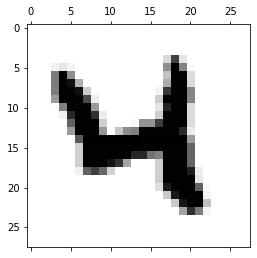

... and with label [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.] after to_categorical

X_train shape: (60000, 784)
Y_train shape: (60000, 10)


In [5]:
# preliminary part in which I set the image features for the neural network
# input image dimensions
img_rows, img_cols = 28, 28 # number of pixels 
# output
num_classes = 10 # 10 digits

# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)

# reshape data, it could depend on Keras backend
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print()

# cast floats to single precision
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
#
# rescale data in interval [0,1]
X_train /= 255
X_test /= 255

# look at an example of data point
print('an example of a data point with label', Y_train[20])
# matshow: display a matrix in a new figure window
plt.matshow(X_train[20,:].reshape(28,28),cmap='binary')
plt.show()

# convert class vectors to binary class matrices, e.g. for use with categorical_crossentropy
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)
print('... and with label', Y_train[20], 'after to_categorical')
print()
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)

In [6]:
# class for the deep neural network

def create_DNN():
    # instantiate model
    model = Sequential()
    # add a dense all-to-all relu layer
    model.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))
    # add a dense all-to-all relu layer
    model.add(Dense(100, activation='relu'))
    # apply dropout with rate 0.5
    model.add(Dropout(0.5))
    # soft-max layer
    model.add(Dense(num_classes, activation='softmax'))
    
    return model

print('Model created successfully and ready to be compiled.')

def compile_model():
    # create the model
    model=create_DNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=SGD(),
                  metrics=['acc'])
    return model

print('Model compiled successfully and ready to be trained.')

Model created successfully and ready to be compiled.
Model compiled successfully and ready to be trained.


In [7]:
# training parameters
batch_size = 32
epochs = 30

# create the deep neural net
model_DNN = compile_model()

# train DNN and store training info in history
history = model_DNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

Epoch 1/30
1875/1875 [==============================] - 12s 6ms/step - loss: 0.7280 - acc: 0.7886 - val_loss: 0.3029 - val_acc: 0.9174
Epoch 2/30
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3727 - acc: 0.8942 - val_loss: 0.2340 - val_acc: 0.9322
Epoch 3/30
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3016 - acc: 0.9160 - val_loss: 0.1970 - val_acc: 0.9421
Epoch 4/30
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2598 - acc: 0.9276 - val_loss: 0.1723 - val_acc: 0.9477
Epoch 5/30
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2301 - acc: 0.9351 - val_loss: 0.1573 - val_acc: 0.9500
Epoch 6/30
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2070 - acc: 0.9418 - val_loss: 0.1430 - val_acc: 0.9544
Epoch 7/30
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1882 - acc: 0.9470 - val_loss: 0.1303 - val_acc: 0.9580
Epoch 8/30
1875/1875 [==============================] -

313/313 [==============================] - 1s 4ms/step - loss: 0.0657 - acc: 0.9782

Test loss: 0.06569628417491913
Test accuracy: 0.9782000184059143


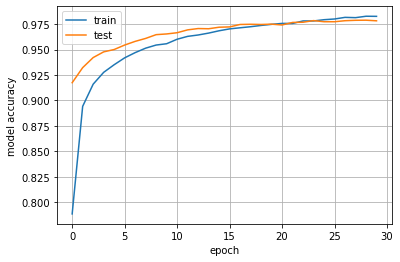

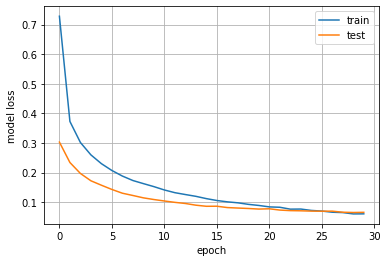

In [8]:
# evaluate model
score = model_DNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.grid(True)
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.grid(True)
plt.show()

313/313 [==============================] - 1s 3ms/step


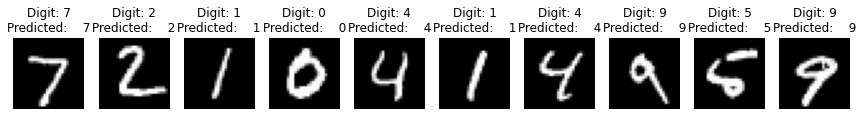

In [9]:
#X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
predictions = model_DNN.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted:    {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

# Summary:
By simply incresing the number of epochs, we can see that the global performance of the algorithm improves greatly,the accuracy reaches a plateau closer to one and the and the training and validation errors gets lower. 

## Change of the optimizer
To improve the performances of the neural network I will try four different optimizer, different from the stichastic gradient descend:
- **ADAGRAD**:  this optimizer changes the learning rate, $\eta$  for each parameter and at every time step ‘t’. It’s a type second order optimization algorithm and it works on the derivative of an error function.


- **AdaDelta**: it is an extension of AdaGrad and tends to remove its decaying learning rate problem. Instead of accumulating all previously squared gradients, Adadelta limits the window of accumulated past gradients to some fixed size  It is characterized by an exponentially moving average, which is used instead of the sum of all the gradients.


- **ADAM**:(Adaptive Moment Estimation) works with momentums of first and second order. The intuition behind the Adam is that there is no need to move extremely fast towards the  minimum, it may be more clever to decrease the velocity a little bit for a careful search. In addition to storing an exponentially decaying average of past squared gradients like AdaDelta, Adam also keeps an exponentially decaying average of past gradients M(t). M(t) and V(t) are values of the first moment which is the mean and the second moment which is the uncentered variance of the gradients respectively.


- **RSMprop**: root mean square propagation. RMSProp is an adaptive learning rate methods and it is anextension of Stochastic Gradient Descent (SGD) algorithm, momentum method, and lies at the foundation of Adam algorithm. The RMSprop optimizer restricts the oscillations in the vertical direction- Therefore, it is possible to  increase the learning rate or, alternatively, the algorithm could take larger steps in the horizontal direction converging to faster the similar approach gradient descent algorithm combine with momentum method.


### ADAM, ADAGRAD, RSMprop, AdaDelta


an example of a data point with label 4


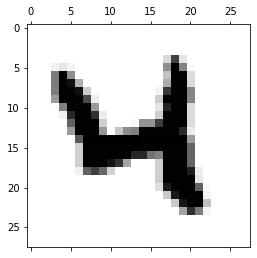

... and with label [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.] after to_categorical

X_train shape: (60000, 784)
Y_train shape: (60000, 10)
Model created successfully and ready to be compiled.
ADAM: model compiled successfully and ready to be trained.
ADAGRAD: model compiled successfully and ready to be trained.
RMSProp: model compiled successfully and ready to be trained.
AdaDelta: Model compiled successfully and ready to be trained.


In [12]:
# class for the deep neural network
# preliminary part in which I set the image features for the neural network
# input image dimensions
img_rows, img_cols = 28, 28 # number of pixels 
# output
num_classes = 10 # 10 digits

# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
# cast floats to single precision
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
#
# rescale data in interval [0,1]
X_train /= 255
X_test /= 255

# look at an example of data point
print('an example of a data point with label', Y_train[20])
# matshow: display a matrix in a new figure window
plt.matshow(X_train[20,:].reshape(28,28),cmap='binary')
plt.show()

# convert class vectors to binary class matrices, e.g. for use with categorical_crossentropy
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)
print('... and with label', Y_train[20], 'after to_categorical')
print()
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)


def create_DNN():
    # instantiate model
    model = Sequential()
    # add a dense all-to-all relu layer
    model.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))
    # add a dense all-to-all relu layer
    model.add(Dense(100, activation='relu'))
    # apply dropout with rate 0.5
    model.add(Dropout(0.5))
    # soft-max layer
    model.add(Dense(num_classes, activation='softmax'))
    
    return model

print('Model created successfully and ready to be compiled.')

def compile_modelADAM():
    # create the model
    model=create_DNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=Adam(),
                  metrics=['acc'])
    return model

print('ADAM: model compiled successfully and ready to be trained.')


def compile_modelADAGRAD():
    # create the model
    model=create_DNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=Adagrad(),
                  metrics=['acc'])
    return model

print('ADAGRAD: model compiled successfully and ready to be trained.')



def compile_modelRMSprop():
    # create the model
    model=create_DNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=RMSprop(),
                  metrics=['acc'])
    return model

print('RMSProp: model compiled successfully and ready to be trained.')


def compile_modelAdaDelta():
    # create the model
    model=create_DNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=Adadelta(),
                  metrics=['acc'])
    return model

print('AdaDelta: Model compiled successfully and ready to be trained.')




In [ ]:
# training parameters
batch_size = 32
epochs = 30

# create the deep neural net for ADAM
model_DNN_ADAM = compile_modelADAM()

# train DNN and store training info in history
historyADAM = model_DNN_ADAM.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

# evaluate model (ADAM)
scoreADAM = model_DNN_ADAM.evaluate(X_test, Y_test, verbose=1)


# create the deep neural net for ADAGRAD
model_DNN_ADAGRAD = compile_modelADAGRAD()

# train DNN and store training info in history
historyADAGRAD = model_DNN_ADAGRAD.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

# evaluate model (ADAGRAD)
scoreADAGRAD = model_DNN_ADAGRAD.evaluate(X_test, Y_test, verbose=1)


# create the deep neural net for RMSprop
model_DNN_RMSprop = compile_modelRMSprop()

# train DNN and store training info in history
historyRMSprop = model_DNN_RMSprop.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

# evaluate model (RMSprop)
scoreRMSprop = model_DNN_RMSprop.evaluate(X_test, Y_test, verbose=1)

# create the deep neural net for AdaDelta
model_DNN_AdaDelta = compile_modelAdaDelta()

# train DNN and store training info in history
historyAdaDelta = model_DNN_AdaDelta.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

# evaluate model (AdaDelta)
scoreAdaDelta = model_DNN_AdaDelta.evaluate(X_test, Y_test, verbose=1)

# print performance

print('Test loss ADAM:', scoreADAM[0])
print('Test accuracy ADAM:', scoreADAM[1])

print('Test loss ADAGRAD:', scoreADAGRAD[0])
print('Test accuracy ADAGRAD:', scoreADAGRAD[1])


print('Test loss RMSprop:', scoreRMSprop[0])
print('Test accuracy RMSprop:', scoreRMSprop[1])


print('Test loss AdaDelta:', scoreAdaDelta[0])
print('Test accuracy AdaDelta:', scoreAdaDelta[1])

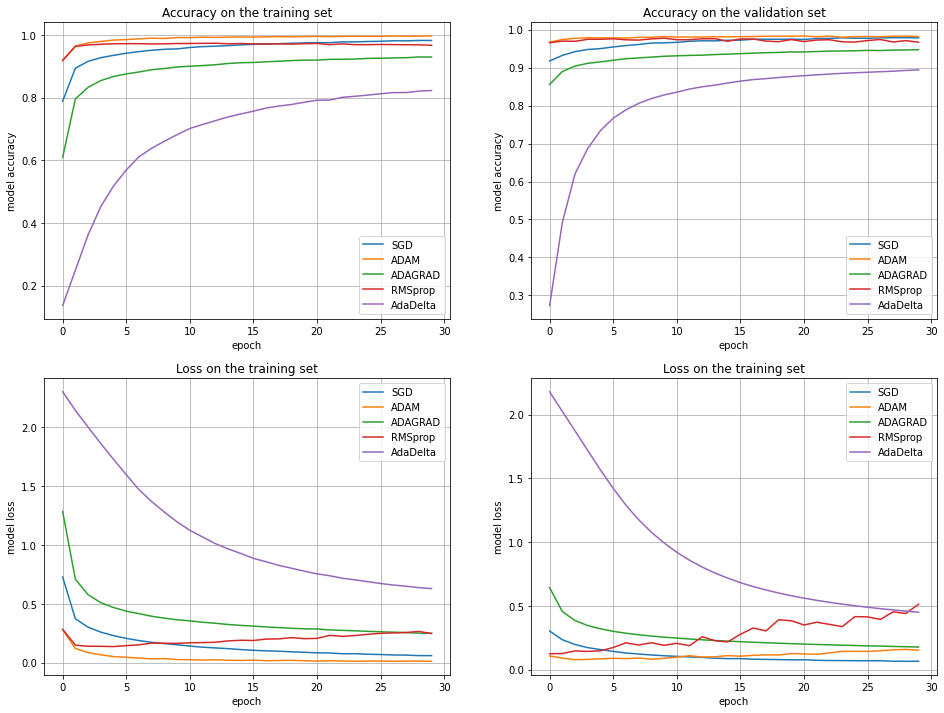

In [23]:
# look into training history

# summarize history for accuracy for the four cases 

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize= (16,12))
ax1.set_title('Accuracy on the training set')
ax1.plot(history.history['acc'])
ax1.plot(historyADAM.history['acc'])
ax1.plot(historyADAGRAD.history['acc'])
ax1.plot(historyRMSprop.history['acc'])
ax1.plot(historyAdaDelta.history['acc'])
ax1.legend(['SGD','ADAM', 'ADAGRAD', 'RMSprop', 'AdaDelta'], loc='best')
ax1.set_ylabel('model accuracy')
ax1.set_xlabel('epoch')
ax1.grid(True)



ax2.set_title('Accuracy on the validation set')
ax2.plot(history.history['val_acc'])
ax2.plot(historyADAM.history['val_acc'])
ax2.plot(historyADAGRAD.history['val_acc'])
ax2.plot(historyRMSprop.history['val_acc'])
ax2.plot(historyAdaDelta.history['val_acc'])
ax2.set_ylabel('model accuracy')
ax2.set_xlabel('epoch')
ax2.legend(['SGD','ADAM', 'ADAGRAD', 'RMSprop', 'AdaDelta'], loc='best')
ax2.grid(True)




# summarize history for loss
ax3.set_title('Loss on the training set')
ax3.plot(history.history['loss'])
ax3.plot(historyADAM.history['loss'])
ax3.plot(historyADAGRAD.history['loss'])
ax3.plot(historyRMSprop.history['loss'])
ax3.plot(historyAdaDelta.history['loss'])
ax3.set_ylabel('model loss')
ax3.set_xlabel('epoch')
ax3.legend(['SGD','ADAM', 'ADAGRAD', 'RMSprop', 'AdaDelta'], loc='best')
ax3.grid(True)


ax4.set_title('Loss on the training set')
ax4.plot(history.history['val_loss'])
ax4.plot(historyADAM.history['val_loss'])
ax4.plot(historyADAGRAD.history['val_loss'])
ax4.plot(historyRMSprop.history['val_loss'])
ax4.plot(historyAdaDelta.history['val_loss'])
ax4.set_ylabel('model loss')
ax4.set_xlabel('epoch')
ax4.legend(['SGD','ADAM', 'ADAGRAD', 'RMSprop', 'AdaDelta'], loc='best')
ax4.grid(True)


The best result in terms of loss (lower) and accuracy (higher), is obtained with the optimizer ADAM.
So now, I will test the neural network trained on 30 epochs and using the ADAM optimizer 

313/313 [==============================] - 1s 3ms/step


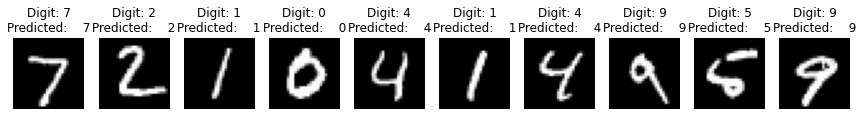

In [20]:
#X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
predictions = model_DNN_ADAM.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted:    {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

 ## <span style="color:blue">  Exercise 12.2 </span>

In thi part of the exercise I will train a convolutional neural network to see is the NN is able to recognise local patterns, such as *local* spatial correlations between the pixels, but also *translational invariance*, which I would like to take advantage of to improve the accuracy of our classification model.
Firstly I will reshape the datas as follows. The architecture of the convolutional neural network is the following:
- Input layer:
  - Conv2D with 10 filters: This layer creates a convolution kernel that is convolved with the layer input to produce a         tensor of outputs. The filters correspond, in the end, to the dimensionality of the output space (i.e. the number of         output filters in the convolution).

- hidden layers:
  - MaxPooling2D layer:it corresponds to a  max pooling operation for 2D spatial data; it downsamples the input along its      spatial dimensions  by taking the maximum value over an input window (of size defined by pool_size) for each channel of    the input.

  - Conv2D layer
  - Dropout layer:the Dropout layer randomly sets input units to 0 with a frequency of rate at each step during training       time, which helps prevent overfitting. Inputs not set to 0 are scaled up by 1/(1 - rate) such that the sum over all         inputs is unchanged.

- output layers:
  - Flatten: it flattens the input.
  - Dense X3: it is a regular densely-connected NN layer.


In [49]:
# class for the deep neural network
# preliminary part in which I set the image features for the neural network
# input image dimensions
img_rows, img_cols = 28, 28 # number of pixels 
# output
num_classes = 10 # 10 digits

# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
# cast floats to single precision
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
#
# rescale data in interval [0,1]
X_train /= 255
X_test /= 255

# convert class vectors to binary class matrices, e.g. for use with categorical_crossentropy
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)

from keras.layers import Flatten, Conv2D, MaxPooling2D

# reshape data, depending on Keras backend
if keras.backend.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')


X_train shape: (60000, 28, 28, 1)
Y_train shape: (60000, 10)

60000 train samples
10000 test samples


In [50]:
# redefine the deep neural network class, so that we will have a convolutional neural network class
def create_CNN():
    # instantiate model
    model = Sequential()
    # add first convolutional layer with 10 filters (dimensionality of output space)
    model.add(Conv2D(10, kernel_size=(5, 5),activation='relu',input_shape=input_shape))
    #hidden layers
    model.add(MaxPooling2D(pool_size=(3,3)))
    model.add(Conv2D(20, kernel_size=(3,3), activation='relu'))
    model.add(Dropout(0.4))
    model.add(MaxPooling2D(pool_size=(2,2)))
    # output layers
    model.add(Flatten())
    model.add(Dense(200,activation='relu'))
    model.add(Dense(100,activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer='SGD',
                  metrics=['acc'])
    return model

model = create_CNN()
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 24, 24, 10)        260       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 8, 8, 10)         0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 6, 6, 20)          1820      
                                                                 
 dropout_10 (Dropout)        (None, 6, 6, 20)          0         
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 3, 3, 20)         0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 180)             

In [51]:
history = model.fit(X_train, Y_train,                 
                            epochs=epochs, batch_size=batch_size, 
                            validation_data=(X_test, Y_test), 
                            shuffle=True, verbose=0)

Model Evaluation 

Test loss: 0.034654926508665085
Test accuracy: 0.9904999732971191


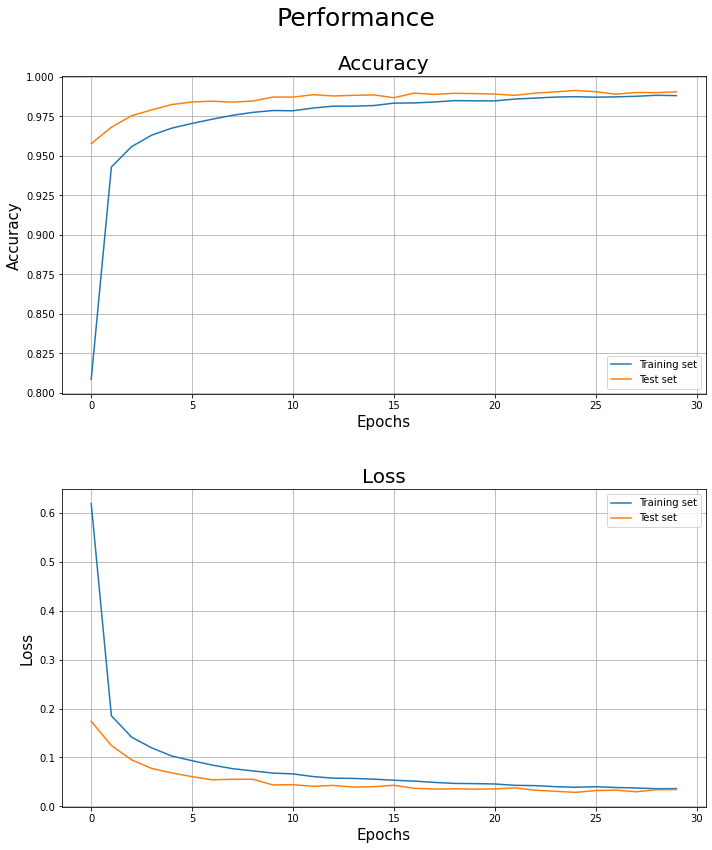

In [52]:
score = model.evaluate(X_test, Y_test, verbose=0)

print("Model Evaluation \n")
print('Test loss:', score[0])
print('Test accuracy:', score[1])


fig1= plt.subplots(figsize=(10,12))
plt.subplot(2,1,1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('Accuracy', fontsize = 15)
plt.xlabel('Epochs', fontsize = 15)
plt.title("Accuracy", fontsize = 20)
plt.legend(['Training set', 'Test set'], loc='best')
plt.grid(True)

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('Loss', fontsize = 15)
plt.xlabel('Epochs', fontsize = 15)
plt.title("Loss", fontsize = 20)
plt.legend(['Training set', 'Test set'], loc='best')
plt.grid(True)

plt.suptitle("Performance", fontsize = 25)
plt.tight_layout()
plt.subplots_adjust(top=0.9,hspace=0.3)
plt.show()

313/313 [==============================] - 2s 6ms/step


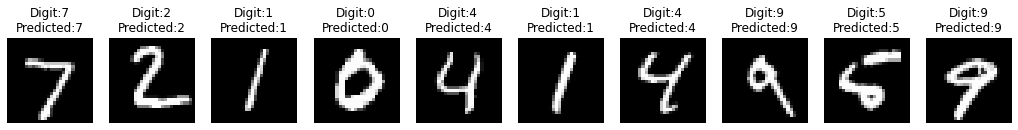

In [53]:
#Predizione

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)
prediction = model.predict(X_test)

plt.figure(figsize=(18, 18)) 

for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit:{}\nPredicted:{}".format(np.argmax(Y_test[i]), np.argmax(prediction[i])))    
    plt.axis('off') 
plt.show()


 ## <span style="color:blue">  Exercise 12.3 </span>
 Now let's try the convolutional and the deep  neural network on a set of hadwritten digits, created using GIMP.

In [54]:
from PIL import Image
import os

digit_filename = ["zero.png", "one.png", "two.png", "three.png", "four.png", 
                  "five.png", "six.png", "seven.png", "eight.png", "nine.png"]
digit_in = []
for n in range(len(digit_filename)):
    digit_in.append(Image.open(digit_filename[n]).convert('L'))

ydim, xdim = digit_in[0].size
pix = []

for n in range(len(digit_filename)):
    pix.append(digit_in[n].load());
    
data = np.zeros((len(digit_filename), xdim, ydim))

for n in range(len(digit_filename)):
    for j in range(ydim):
        for i in range(xdim):
            data[n][i,j]=pix[n][j,i]
for n in range(len(digit_filename)):
    data[n] /= 255

1/1 [==============================] - 0s 21ms/step
Deep neural network prediction


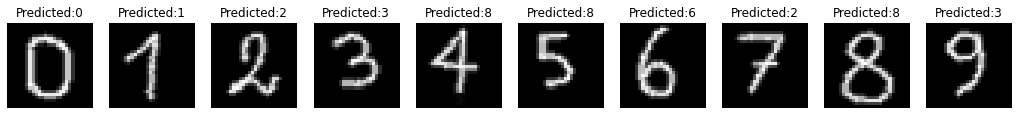

In [55]:
#Prediction deep neural network
data_DNN = data.reshape(data.shape[0], xdim*ydim)
prediction = model_DNN_ADAM.predict(data_DNN)
data_DNN = data_DNN.reshape(data_DNN.shape[0], xdim, ydim, 1)


plt.figure(figsize=(18, 18)) 
print('Deep neural network prediction')
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(data_DNN[i, :, :, 0], cmap='gray')    
    plt.title("Predicted:{}".format(np.argmax(prediction[i])))    
    plt.axis('off') 
plt.show()

1/1 [==============================] - 0s 50ms/step
Convolutional neural network prediction


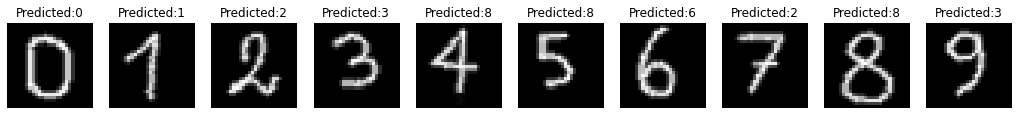

In [56]:
if tf.keras.backend.image_data_format() == 'channels_first':
    data_CNN = data.reshape(data.shape[0], 1, xdim, ydim)
else:
    data_CNN = data.reshape(data.shape[0], xdim, ydim, 1)
    
prediction_CNN = model.predict(data_CNN)

plt.figure(figsize=(18, 18)) 
print('Convolutional neural network prediction')
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(data_CNN[i, :, :, 0], cmap='gray')    
    plt.title("Predicted:{}".format(np.argmax(prediction[i])))    
    plt.axis('off') 
plt.show()

In both cases the neural networks are able to predict correctly 6 out of 10 digits. This result could be justified by the fact that the digits used for the training of the neural networks where produced by a different hand. In this case a different handwriting gives quite diverse reusults.